In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/extra_need/Datas/data.csv", encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df = df.dropna(subset=["CustomerID"])
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [6]:
customer_df = df.groupby("CustomerID").agg(
    TotalQuantity=("Quantity", "sum"),
    TotalSpending=("TotalPrice", "sum")
).reset_index()
customer_df.head()

,CustomerID,TotalQuantity,TotalSpending
0,12346.0,74215,77183.60
1,12347.0,2458,4310.00
2,12348.0,2341,1797.24
3,12349.0,631,1757.55
4,12350.0,197,334.40


In [7]:
customer_df.to_csv("customer_summary.csv", index=False)

In [8]:
X = customer_df[["TotalQuantity", "TotalSpending"]]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

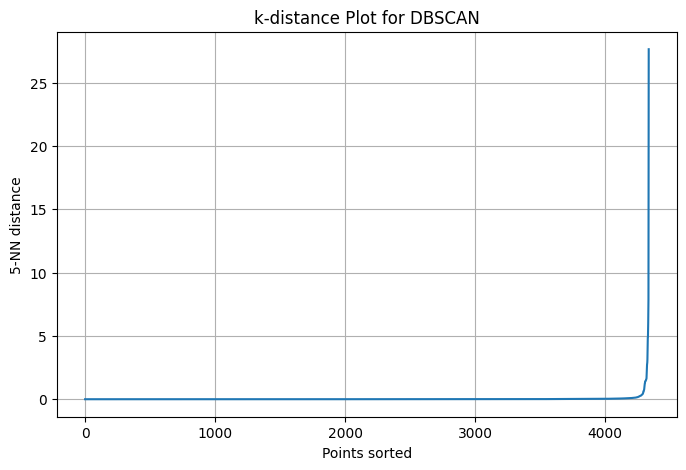

In [10]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, _ = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("Points sorted")
plt.ylabel("5-NN distance")
plt.title("k-distance Plot for DBSCAN")
plt.grid(True)
plt.show()

In [11]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
customer_df["Cluster"] = labels
print("Clusters:", set(labels))

Clusters: {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}


In [12]:
mask = labels != -1
if len(set(labels[mask])) > 1:
    print(
        "Silhouette Score:",
        silhouette_score(X_scaled[mask], labels[mask])
    )
else:
    print("Not enough clusters for silhouette score")

Silhouette Score: 0.8820413245845837


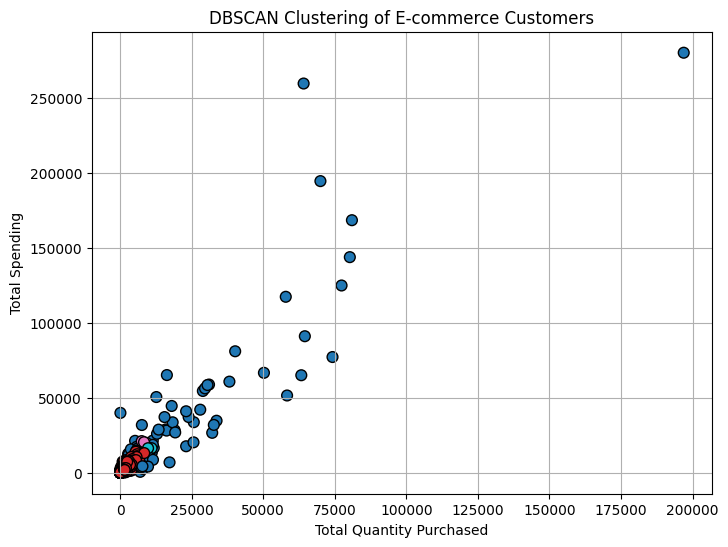

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(
    customer_df["TotalQuantity"],
    customer_df["TotalSpending"],
    c=labels,
    cmap="tab10",
    s=60,
    edgecolors="black"
)
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Spending")
plt.title("DBSCAN Clustering of E-commerce Customers")
plt.grid(True)

In [14]:
import pickle
with open("dbscan_ecommerce.pkl", "wb") as f:
    pickle.dump(dbscan, f)
with open("scaler_ecommerce.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [15]:
import pickle

with open("dbscan_ecommerce.pkl", "rb") as f:
    loaded_dbscan_model = pickle.load(f)

with open("scaler_ecommerce.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

print("DBSCAN model and StandardScaler loaded successfully.")

DBSCAN model and StandardScaler loaded successfully.
